# Pre-processing of LARC-RRP study

Importing packages

In [73]:
import os

import SimpleITK as sitk

import ImageViewer as iv
import preprocessing as p

# this is needed for 'interactive' plots in jupyter notebook
%matplotlib notebook

# Pre-processing

Now lets define the pre-processing script. The aim is to resample and crop the image to a box around the manual contours with a specific margin.

In [74]:
def preprocessing_radiomics(path_to_patient_image_folder, destination_folder, image_prefix='image', mask_prefix='1 RTSTRUCT LARC_MRS1-label',
                           margin_in_mm=[10,10,10], voxelsize=None):
    """
    This function takes the data from patient_image_folder, 
    It Croops images and masks in this folder to a box around the union of the masks. 
    You can use margin_in_mm to adjust the margin [mx, my, mz] (default is 10 mm in each direction.)
    If voxelsize is None, the original voxelsize is used
    If voxelsize [sx, sy, sz] (for example [1,1,1]) images and masks are resampled to this new voxelsize
    
    The results are saved to the destionation folder, where the file names are unchanged.
    
    """
    ### Create destinaion_folder if it does not already exist
    if not os.path.isdir(destination_folder):
        os.makedirs(destination_folder)
    
    
    ### Read the data
    
    data = {'images':{}, 'mask':{}}

    # Assumption: nii files, Images start with img and Masks with Mask
    for file in os.listdir(path_to_patient_image_folder):
        if file.startswith(image_prefix) and file.endswith('.nii'):
            data['images'][file] = sitk.ReadImage(os.path.join(path_to_patient_image_folder, file))
            
        if file.startswith(mask_prefix) and file.endswith('.nii'):
            data['mask'][file] = 0<sitk.ReadImage(os.path.join(path_to_patient_image_folder, file))
            mask_file_name = file
    
    ### get the union and intersection of all avaliable masks
#     union = sitk.Or(*list(data['masks'].values()))

    
    ### Prepare the resampling and croping
    resampler = p.Resample_And_Crop()
    resampler.set_roi_as_box_around_mask(data['mask'][mask_file_name], margin_in_mm=margin_in_mm)
    if voxelsize:
        resampler.set_spacing(voxelsize)
        
    
    ### Do the resampling and crooping and save the results in the destination_folder
    for filename, image in data['images'].items():
        sitk.WriteImage(resampler.process_image(image), 
                        os.path.join(destination_folder, filename))
    for filename, mask in data['mask'].items():
        sitk.WriteImage(resampler.process_mask(mask), 
                       os.path.join(destination_folder, filename))

Creating a list of the source folder paths and destination folder paths

In [104]:
# get subfolders in a main_data_folder:
src_main_folder = '/Volumes/Untitled/LARC_T2_cleaned_nii'
dst_main_folder = '/Volumes/Untitled/LARC_T2_preprocessed'


src_subfolder_list = [f for f in os.listdir(src_main_folder) #Finds all the subfolders in folder
                      if os.path.isdir(os.path.join(main_data_folder, f))]

dst_subfolder_list = [f for f in os.listdir(dst_main_folder) 
                      if os.path.isdir(os.path.join(main_data_folder, f))]

src_list = []
dst_list = []

for i in range(len(src_subfolder_list)):
    src_list.append(src_main_folder + '/' + src_subfolder_list[i] + '/MRS1')
    dst_list.append(dst_main_folder + '/' + dst_subfolder_list[i])
    
    
src_list.insert(0, src_list.pop(len(src_list)-1))
dst_list.insert(0, dst_list.pop(len(dst_list)-1))

#for i in range(len(src_list)):
#    print(i)
#    print(src_list[i])
#    print(dst_list[i])

Next, let's run the preprocessing on all patients in the source folder list. 

In [83]:
image_prefix = 'image'
mask_prefix = '1 RTSTRUCT LARC_MRS1-label'

for i in range(len(src_list)):
    preprocessing_radiomics(src_list[i], dst_list[i], margin_in_mm=[10,10,10])

Now, try to plot some of the images to check that they look ok.

Remember:
- Push 'a' on keyboard to see the mask file
- Push '2' on keyboeard to change view of slices
- Push '8' or '9' to change mask view

<IPython.core.display.Javascript object>


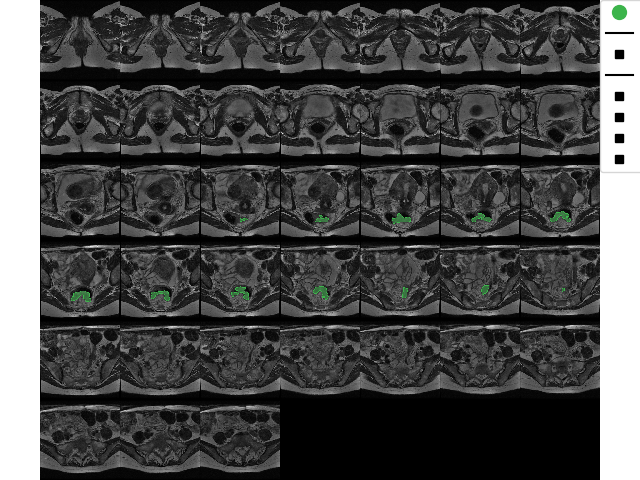

<IPython.core.display.Javascript object>


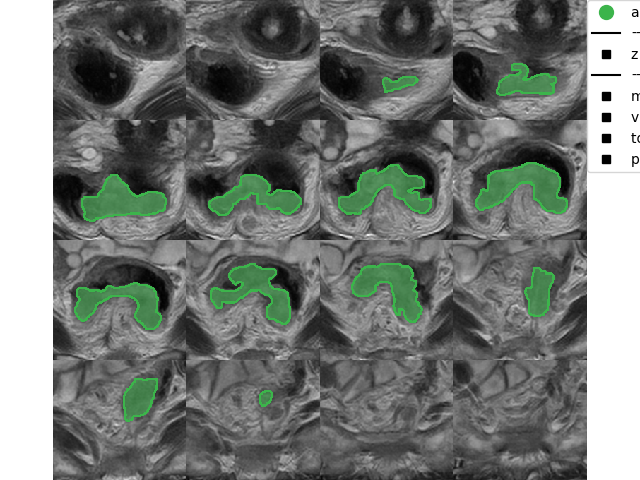

In [103]:
path_to_folder = r'/Volumes/Untitled/LARC_T2_cleaned_nii/LARC-RRP-021/MRS1' #Folder with nifty images
destination_folder = r'/Volumes/Untitled/LARC_T2_preprocessed/LARC-RRP-021' #Folder with preprocessed images
image_prefix = 'image'
mask_prefix = '1 RTSTRUCT LARC_MRS1-label'

plot_t2 = iv.show_folder(path_to_folder, image_prefix, mask_prefix)
plot_3 = iv.show_folder(destination_folder, image_prefix, mask_prefix)